## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[2048, 1024, 512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in (10, 25):
    earlystop = EarlyStopping(monitor="val_acc", 
                              patience=i, 
                              verbose=1)
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    tag = f'val_acc-{i}'
    results[tag] = {'train-loss': train_loss,
                'valid-loss': valid_loss,
                'train-acc': train_acc,
                'valid-acc': valid_acc}





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
______

50000/50000 [==============================] - 23s 455us/step - loss: 0.0053 - acc: 0.9994 - val_loss: 2.5391 - val_acc: 0.5362
Epoch 22/50
50000/50000 [==============================] - 23s 454us/step - loss: 0.0037 - acc: 0.9998 - val_loss: 2.5455 - val_acc: 0.5299
Epoch 23/50
50000/50000 [==============================] - 23s 460us/step - loss: 0.0022 - acc: 0.9999 - val_loss: 2.5509 - val_acc: 0.5331
Epoch 24/50
50000/50000 [==============================] - 23s 455us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.5562 - val_acc: 0.5363
Epoch 25/50
50000/50000 [==============================] - 23s 461us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.5660 - val_acc: 0.5343
Epoch 26/50
50000/50000 [==============================] - 23s 469us/step - loss: 8.9137e-04 - acc: 1.0000 - val_loss: 2.5738 - val_acc: 0.5353
Epoch 27/50
50000/50000 [==============================] - 23s 466us/step - loss: 7.8756e-04 - acc: 1.0000 - val_loss: 2.5773 - val_acc: 0.5362
Epoch 28/50
50000/50000 

Epoch 17/50
50000/50000 [==============================] - 23s 453us/step - loss: 0.0178 - acc: 0.9973 - val_loss: 2.4216 - val_acc: 0.5272
Epoch 18/50
50000/50000 [==============================] - 23s 450us/step - loss: 0.0124 - acc: 0.9983 - val_loss: 2.4594 - val_acc: 0.5300
Epoch 19/50
50000/50000 [==============================] - 22s 443us/step - loss: 0.0080 - acc: 0.9992 - val_loss: 2.5245 - val_acc: 0.5308
Epoch 20/50
50000/50000 [==============================] - 22s 448us/step - loss: 0.0047 - acc: 0.9997 - val_loss: 2.5382 - val_acc: 0.5309
Epoch 21/50
50000/50000 [==============================] - 23s 453us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 2.5234 - val_acc: 0.5322
Epoch 22/50
50000/50000 [==============================] - 22s 444us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 2.5315 - val_acc: 0.5332
Epoch 23/50
50000/50000 [==============================] - 22s 448us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.5445 - val_acc: 0.5375
Epoch 24/50
50000/50

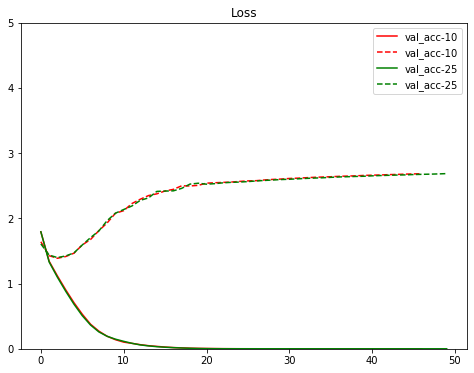

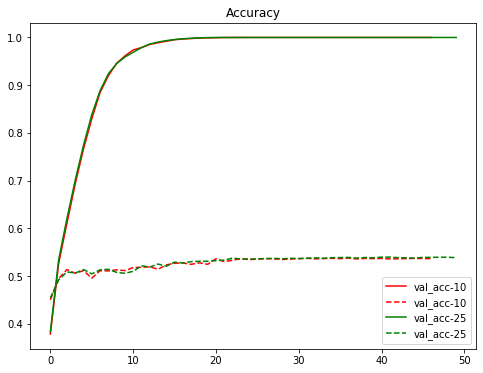

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()